This dataset was retrieved from the Kaggle website. This dataset provides a comprehensive overview of online sales transactions across different product categories. Each row represents a single transaction with detailed information such as the order Id, date, category, product name, quantity sold, unit price, total price, region, and payment method. In this Python project I will find trends and patterns to unlock actionable insights. I will utilize the power of Python and its libraries to clean the dataframe by checking for and removing any duplicate rows of data and null values. Then I will transform the dataframe by extracting the month and the day from the data column to get a more in depth look at the data. I will then process the data by calculating sums, averages, maximums, and minimum values from the unit sold and unit price columns. Finally, I will answer the business questions about the dataset inquired by the stakeholder.

Questions:

1) Can you analyze sales trends over time to identify seasonal patterns or growth opportunities?
2) Can you explore the popularitly of different product categories across regions?
3) Can you investigate the impact of payment methods on sales volumn or revenue?
4) Can you identify top-selling products within each category to optimize inventory and marketing strategies?
5) Can you evaluate the performance of specific products or categories in different regions to tailor marketing campaigns accordingly?

I will now import the libraries and set some options that will be useful for my analysis.
    

In [48]:
import numpy as np
import pandas as pd 
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use("ggplot")
import seaborn as sns
sns.set_style("darkgrid")

Now I will load my data into a pandas dataframe.

In [2]:
online_sales = pd.read_csv(r"C:\Users\Jason\OneDrive\Online Sales Data.csv")

I will examine the first and last 3 rows of the dataframe to check for consistency.

In [3]:
online_sales.head(3)

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,1/1/2024,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,1/2/2024,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,1/3/2024,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card


In [4]:
online_sales.tail(3)

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
237,10238,8/25/2024,Books,The Handmaid's Tale by Margaret Atwood,3,10.99,32.97,North America,Credit Card
238,10239,8/26/2024,Beauty Products,Sunday Riley Luna Sleeping Night Oil,1,55.00,55.00,Europe,PayPal
239,10240,8/27/2024,Sports,Yeti Rambler 20 oz Tumbler,2,29.99,59.98,Asia,Credit Card


Great, all data looks to be imported successfully. 

Now I will move on to checking how many rows and columns of data in my dataframe.

In [6]:
online_sales.shape
print(f"There are {online_sales.shape[0]} rows and {online_sales.shape[1]} columns of data in this dataframe.")

There are 240 rows and 9 columns of data in this dataframe.


Now I will examine the data a bit more by checking for duplicate rows of data, null values, number of unique values per column, and assuring that the dtypes for each column are correct.

###### Checking for duplicate values.

In [8]:
online_sales.duplicated().sum()
print(f"This dataframe has {online_sales.duplicated().sum()} rows of duplicated data.") 

This dataframe has 0 rows of duplicated data.


###### Checking for N/A values.

In [10]:
for na in online_sales.columns:
    null_vals = online_sales[na].isnull().sum()
    print(f"There are {null_vals} N/A values in the column {na}.") 

There are 0 N/A values in the column Transaction ID.
There are 0 N/A values in the column Date.
There are 0 N/A values in the column Product Category.
There are 0 N/A values in the column Product Name.
There are 0 N/A values in the column Units Sold.
There are 0 N/A values in the column Unit Price.
There are 0 N/A values in the column Total Revenue.
There are 0 N/A values in the column Region.
There are 0 N/A values in the column Payment Method.


###### This dataframe contains 0 null values.

###### Checking for unique values.

In [11]:
for uni in online_sales.columns:
    uni_vals = online_sales[uni].nunique()
    print(f"The column {uni} has {uni_vals} unique values.")

The column Transaction ID has 240 unique values.
The column Date has 240 unique values.
The column Product Category has 6 unique values.
The column Product Name has 232 unique values.
The column Units Sold has 7 unique values.
The column Unit Price has 117 unique values.
The column Total Revenue has 173 unique values.
The column Region has 3 unique values.
The column Payment Method has 3 unique values.


###### Checking the dtypes of the dataframe.

In [12]:
online_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


For this dataframe, all of the dtypes are in the correct format with the exception of the Date column. I will utilize the pandas library to convert the Date column to datetime dtype. This process will allow me extract the month and the day of the week from the column for a more in depth analysis.

###### Converting the Date column to the correct dtype.

In [13]:
online_sales["Date"] = pd.to_datetime(online_sales["Date"])

###### Extracting the month and day from the Date column.

In [14]:
online_sales["Month"] = online_sales["Date"].dt.month_name()
online_sales["Day"] = online_sales["Date"].dt.day_name()

Perfect! Now that the Date column has been updated to the proper dtype and the month and day have been extracted from the Date column, I will recheck the dtypes of the columns to verify the changes were made correctly.

###### Rechecking the dtypes.

In [37]:
online_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    240 non-null    int64         
 1   Date              240 non-null    datetime64[ns]
 2   Product Category  240 non-null    object        
 3   Product Name      240 non-null    object        
 4   Units Sold        240 non-null    int64         
 5   Unit Price        240 non-null    float64       
 6   Total Revenue     240 non-null    float64       
 7   Region            240 non-null    object        
 8   Payment Method    240 non-null    object        
 9   Month             240 non-null    object        
 10  Day               240 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 20.8+ KB


All dtypes have been corrected to the proper format as well as the addition of the month and day columns.

Now I will dive into the categorical and numerical columns to get a better understanding of the statistical information related to those columns.

###### Looking at the statistical data related to the numerical columns.

In [36]:
online_sales.describe()

,Transaction ID,Units Sold,Unit Price,Total Revenue
count,240.00000,240.000000,240.000000,240.000000
mean,10120.50000,2.158333,236.395583,335.699375
std,69.42622,1.322454,429.446695,485.804469
min,10001.00000,1.000000,6.500000,6.500000
25%,10060.75000,1.000000,29.500000,62.965000
50%,10120.50000,2.000000,89.990000,179.970000
75%,10180.25000,3.000000,249.990000,399.225000
max,10240.00000,10.000000,3899.990000,3899.990000


###### Looking at the statistical data related to the categorical columns.

In [35]:
online_sales.describe(include="object") 

,Product Category,Product Name,Region,Payment Method,Month,Day
count,240,240,240,240,240,240
unique,6,232,3,3,8,7
top,Electronics,Dyson Supersonic Hair Dryer,North America,Credit Card,January,Monday
freq,40,2,80,120,31,35


Now that I have loaded and transformed my data, I can now begin my analysis and the answering of the related business questions inquired by the stakeholder.

QUESTIONS:

###### 1) Can you analyze sales trends over time to identify seasonal patterns or growth opportunities?

###### Sales by Month

In [246]:
sales_by_month = online_sales.groupby("Month")["Total Revenue"].sum().sort_values(ascending=False).reset_index()
sales_by_month = sales_by_month.set_index("Month") 
sales_by_month
def highlight_max_min(row):
    max_value = row["Total Revenue"].max()
    min_value = row["Total Revenue"].min()
    return ["backgroumnd-color: green" if val == max_value
            else "background-color: red" if val == min_value
            else " " for val in row]
sales_by_month.style.highlight_max(subset=pd.IndexSlice[:, ["Total Revenue"]], color="green") \
                    .highlight_min(subset=pd.IndexSlice[:, ["Total Revenue"]], color="red")

,Total Revenue
Month,
January,14548.320000
March,12849.240000
April,12451.690000
February,10803.370000
May,8455.490000
June,7384.550000
August,7278.110000
July,6797.080000


As we can see from the results, the first four months of the year produce the highest revenue with January bringing in the most revenue at $14,548.32. While the next four months generate the lowest revenue with July bringing in the least amount of revenue at $6,797.08. I would recommend promoting sales and discounts during the months of May, June, July, and August to potentially increase the amount of sales during those four months.

I will visualize these results in a bar graph.

The month of January brings in the highest revenue and the month of July brings in the lowest amount of revenue.


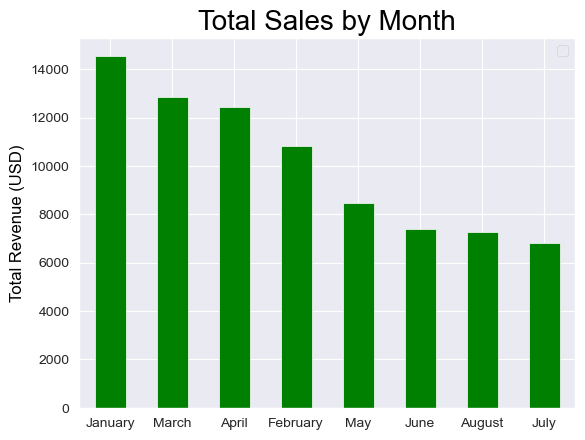

In [60]:
sales_by_month.plot(kind="bar",
                    rot=0,
                    color="green")
plt.title("Total Sales by Month",
          color="black",
          fontsize=20)
plt.legend("") 
plt.xlabel("") 
plt.ylabel("Total Revenue (USD)",
           color="black")
print("The month of January brings in the highest revenue and the month of July brings in the lowest amount of revenue.")


Now I will analyze the total sales by the day of the week.

###### Sales by Day

In [247]:
sales_by_day = online_sales.groupby("Day")["Total Revenue"].sum().sort_values(ascending=False).reset_index()
sales_by_day = sales_by_day.set_index("Day")
sales_by_day
def highlight_max_min(row):
    max_value = row["Total Revenue"].max()
    min_value = row["Total Revenue"].min()
    return ["backgroumnd-color: green" if val == max_value
            else "background-color: red" if val == min_value
            else " " for val in row]
sales_by_day.style.highlight_max(subset=pd.IndexSlice[:, ["Total Revenue"]], color="green") \
                    .highlight_min(subset=pd.IndexSlice[:, ["Total Revenue"]], color="red")

,Total Revenue
Day,
Tuesday,13518.340000
Friday,12918.740000
Monday,12253.350000
Saturday,11494.020000
Sunday,11153.300000
Wednesday,10402.140000
Thursday,8827.960000


The data indicates that Tuesdays, Fridays, and Mondays generate the most revenue, while Wednesdays and Thursdays generate the least amount of revenue. Perhaps thinking about running specials on products on Wednesdays and Thursdays will increase profits.

Now I will visualize the above results in a bar graph.

Tuesdays generate the highest amount of total revenue, and Thursdays generate the lowest amount of total revenue.


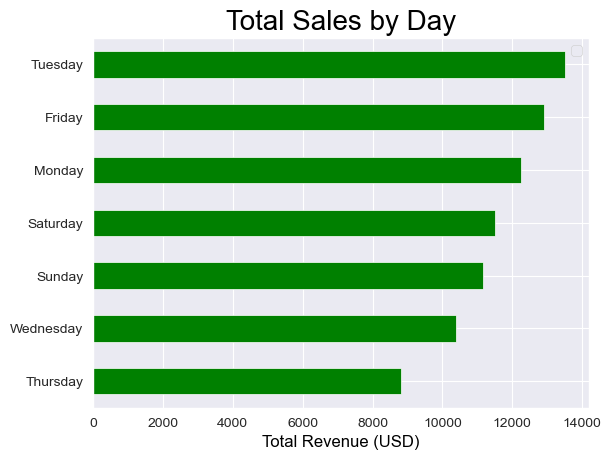

In [61]:
sales_by_day.sort_values(by="Total Revenue", ascending=True).plot(kind="barh",
                                                                  color="green")
plt.title("Total Sales by Day",
          color="black",
          fontsize=20)
plt.legend("")
plt.ylabel("") 
plt.xlabel("Total Revenue (USD)",
           color="black") 
print("Tuesdays generate the highest amount of total revenue, and Thursdays generate the lowest amount of total revenue.")

###### 2) Can you explore the popularity of different product categories across regions?

###### Sales by Category and Region

In [248]:
sales_by_category_by_region = online_sales.groupby(["Product Category", "Region"])["Total Revenue"].sum().sort_values(ascending=False).reset_index()
sales_by_category_by_region = sales_by_category_by_region.set_index("Product Category") 
sales_by_category_by_region
def highlight_max_min(row):
    max_value = row["Total Revenue"].max()
    min_value = row["Total Revenue"].min()
    return ["backgroumnd-color: green" if val == max_value
            else "background-color: red" if val == min_value
            else " " for val in row]
sales_by_category_by_region.style.highlight_max(subset=pd.IndexSlice[:, ["Total Revenue"]], color="green") \
                    .highlight_min(subset=pd.IndexSlice[:, ["Total Revenue"]], color="red")

,Region,Total Revenue
Product Category,,
Electronics,North America,34982.410000
Home Appliances,Europe,18646.160000
Sports,Asia,14326.520000
Clothing,Asia,8128.930000
Beauty Products,Europe,2621.900000
Books,North America,1861.930000


Electronics are the most popular category in the North America region with a total revenue of $34,982.41. Home Appliances are the second most popular category in the Europe region with $18,646.16 in total revenue. While Sports are the third most popular category in the Asia region with $14,326.52 in total revenue.

###### 3) Can you investigate the impact of payment methods on sales volume or revenue?

In [251]:
total_revenue_by_payment_methods = online_sales.groupby("Payment Method")["Total Revenue"].sum().sort_values(ascending=False).reset_index()
total_revenue_by_payment_methods
def highlight_max_min(row):
    max_value = row["Total Revenue"].max()
    min_value = row["Total Revenue"].min()
    return ["backgroumnd-color: green" if val == max_value
            else "background-color: red" if val == min_value
            else " " for val in row]
total_revenue_by_payment_methods.style.highlight_max(subset=pd.IndexSlice[:, ["Total Revenue"]], color="green") \
                    .highlight_min(subset=pd.IndexSlice[:, ["Total Revenue"]], color="red")

,Payment Method,Total Revenue
0,Credit Card,51170.860000
1,PayPal,21268.060000
2,Debit Card,8128.930000


As indicated, the payment method that generated the most revenue was Credit Cards with a total of $51,170.86. Followed by PayPal with a total of $21,268.06, and Lastly Debit Cards with a total of $8,128.93.

I will visualize the percentages of the total revenue by payment method with a pie chart visual.

Below is a pie chart displaying the percentages of total revenue by payment method.


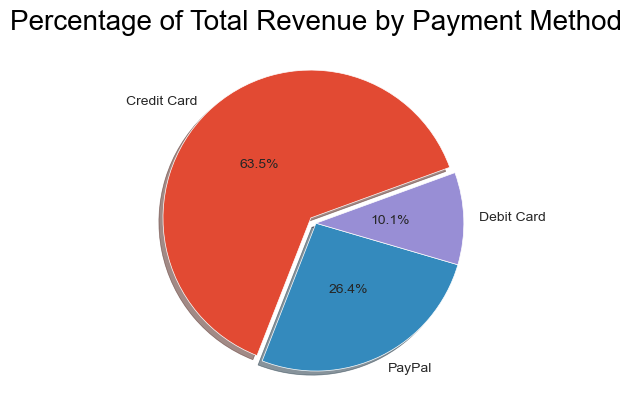

In [132]:
e = [0.05, 0, 0]
plt.pie(total_revenue_by_payment_methods["Total Revenue"],
         labels=total_revenue_by_payment_methods["Payment Method"],
         autopct="%1.1f%%",
         pctdistance=0.5,
         startangle=20,
         explode = e,
         shadow=True)
plt.title("Percentage of Total Revenue by Payment Method",
          color="black",
          fontsize=20)
print("Below is a pie chart displaying the percentages of total revenue by payment method.")

###### 4) Can you identify top-selling products within each category to optimize inventory and marketing strategies?

In [231]:
top_10_selling_beauty_products = online_sales.loc[online_sales["Product Category"] == "Beauty Products"].groupby(["Product Name", "Product Category"])["Total Revenue"].sum().sort_values(ascending=False).reset_index()[:10].set_index("Product Name")
top_10_selling_beauty_products
def highlight_max_min(row):
    max_value = row["Total Revenue"].max()
    min_value = row["Total Revenue"].min()
    return ["background-color: green" if val == max_value
            else "background-color: red" if val == min_value
            else " " for val in row]

top_10_selling_beauty_products.style.highlight_max(subset=pd.IndexSlice[:, ["Total Revenue"]], color="green") \
                         .highlight_min(subset=pd.IndexSlice[:, ["Total Revenue"]], color="red")

,Product Category,Total Revenue
Product Name,,
Dyson Supersonic Hair Dryer,Beauty Products,399.990000
La Mer Crème de la Mer Moisturizer,Beauty Products,190.000000
Chanel No. 5 Perfume,Beauty Products,129.990000
Tom Ford Black Orchid Perfume,Beauty Products,125.000000
Sunday Riley Good Genes,Beauty Products,105.000000
Estee Lauder Advanced Night Repair,Beauty Products,105.000000
Lancome La Vie Est Belle,Beauty Products,102.000000
Charlotte Tilbury Magic Cream,Beauty Products,100.000000
Neutrogena Skincare Set,Beauty Products,89.990000


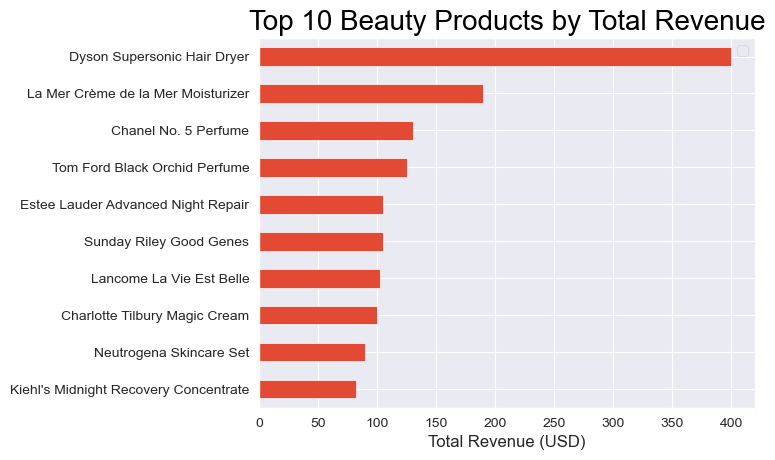

In [177]:
top_10_selling_beauty_products.sort_values(by="Total Revenue", ascending=True).plot(kind="barh")
plt.title("Top 10 Beauty Products by Total Revenue",
          color="black",
          fontsize=20)
plt.legend("") 
plt.ylabel("")
plt.xlabel("Total Revenue (USD)") 
print("") 

In [232]:
top_10_selling_book_products = online_sales.loc[online_sales["Product Category"] == "Books"].groupby(["Product Name", "Product Category"])["Total Revenue"].sum().sort_values(ascending=False).reset_index()[:10].set_index("Product Name")
top_10_selling_book_products
def highlight_max_min(row):
    max_value = row["Total Revenue"].max()
    min_value = row["Total Revenue"].min()
    return ["background-color: green" if val == max_value
            else "background-color: red" if val == min_value
            else " " for val in row]

top_10_selling_book_products.style.highlight_max(subset=pd.IndexSlice[:, ["Total Revenue"]], color="green") \
                         .highlight_min(subset=pd.IndexSlice[:, ["Total Revenue"]], color="red")

,Product Category,Total Revenue
Product Name,,
The Silent Patient by Alex Michaelides,Books,134.950000
Becoming by Michelle Obama,Books,130.000000
"Salt, Fat, Acid, Heat by Samin Nosrat",Books,107.970000
The Catcher in the Rye by J.D. Salinger,Books,88.930000
Educated by Tara Westover,Books,84.000000
1984 by George Orwell,Books,79.960000
Where the Crawdads Sing by Delia Owens,Books,75.960000
Harry Potter and the Sorcerer's Stone,Books,74.970000
Dune by Frank Herbert,Books,71.960000


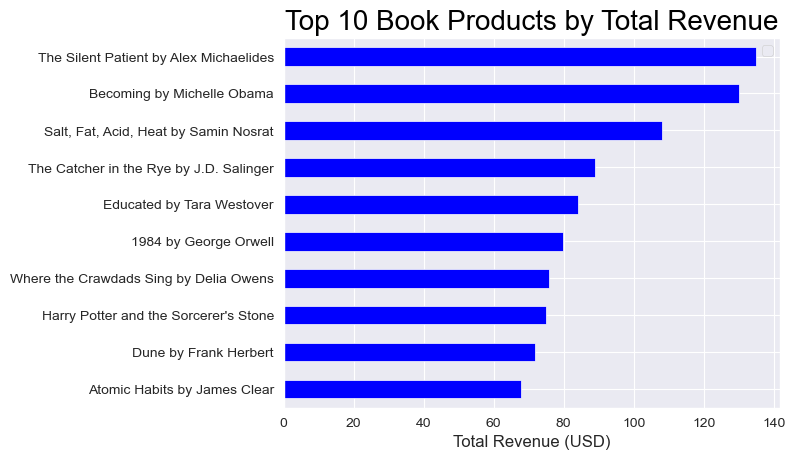

In [176]:
top_10_selling_book_products.sort_values(by="Total Revenue", ascending=True).plot(kind="barh", color="b")
plt.title("Top 10 Book Products by Total Revenue",
          color="black",
          fontsize=20)
plt.legend("") 
plt.ylabel("") 
plt.xlabel("Total Revenue (USD)") 
print("")

In [233]:
top_10_selling_clothing_products = online_sales.loc[online_sales["Product Category"] == "Clothing"].groupby(["Product Name", "Product Category"])["Total Revenue"].sum().sort_values(ascending=False).reset_index()[:10].set_index("Product Name")
top_10_selling_clothing_products
def highlight_max_min(row):
    max_value = row["Total Revenue"].max()
    min_value = row["Total Revenue"].min()
    return ["background-color: green" if val == max_value
            else "background-color: red" if val == min_value
            else " " for val in row]

top_10_selling_clothing_products.style.highlight_max(subset=pd.IndexSlice[:, ["Total Revenue"]], color="green") \
                         .highlight_min(subset=pd.IndexSlice[:, ["Total Revenue"]], color="red")

,Product Category,Total Revenue
Product Name,,
Nike Air Force 1,Clothing,539.940000
North Face Down Jacket,Clothing,499.980000
Ray-Ban Aviator Sunglasses,Clothing,464.970000
Adidas Ultraboost Running Shoes,Clothing,359.980000
Adidas Ultraboost Shoes,Clothing,359.980000
Adidas Originals Superstar Sneakers,Clothing,319.960000
Lululemon Align Leggings,Clothing,294.000000
Patagonia Better Sweater,Clothing,279.980000
Nike Air Force 1 Sneakers,Clothing,270.000000


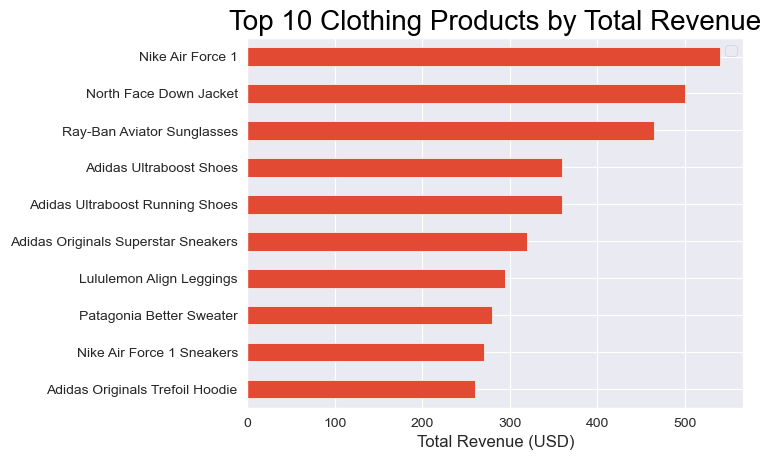

In [175]:
top_10_selling_clothing_products.sort_values(by="Total Revenue", ascending=True).plot(kind="barh")
plt.title("Top 10 Clothing Products by Total Revenue",
          color="black",
          fontsize=20)
plt.legend("") 
plt.ylabel("") 
plt.xlabel("Total Revenue (USD)") 
print("") 

In [236]:
top_10_selling_electronics_products = online_sales.loc[online_sales["Product Category"] == "Electronics"].groupby(["Product Name", "Product Category"])["Total Revenue"].sum().sort_values(ascending=False).reset_index()[:10].set_index("Product Name")
top_10_selling_electronics_products
def highlight_max_min(row):
    max_value = row["Total Revenue"].max()
    min_value = row["Total Revenue"].min()
    return ["background-color: green" if val == max_value
            else "background-color: red" if val == min_value
            else " " for val in row]

top_10_selling_electronics_products.style.highlight_max(subset=pd.IndexSlice[:, ["Total Revenue"]], color="green") \
                         .highlight_min(subset=pd.IndexSlice[:, ["Total Revenue"]], color="red")

,Product Category,Total Revenue
Product Name,,
Canon EOS R5 Camera,Electronics,3899.990000
MacBook Pro 16-inch,Electronics,2499.990000
Apple MacBook Pro 16-inch,Electronics,2399.000000
iPhone 14 Pro,Electronics,1999.980000
HP Spectre x360 Laptop,Electronics,1599.990000
Samsung Odyssey G9 Gaming Monitor,Electronics,1499.990000
Samsung Galaxy Tab S8,Electronics,1499.980000
Microsoft Surface Laptop 4,Electronics,1299.990000
Samsung QLED 4K TV,Electronics,1199.990000


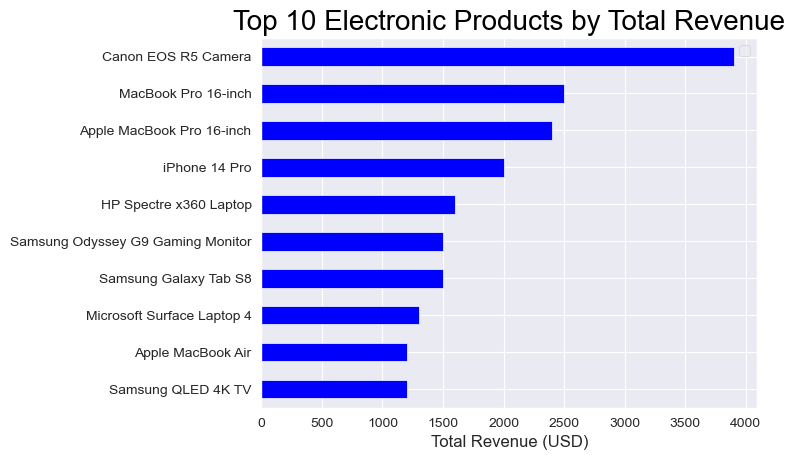

In [181]:
top_10_selling_electronics_products.sort_values(by="Total Revenue", ascending=True).plot(kind="barh", color="b")
plt.title("Top 10 Electronic Products by Total Revenue",
          color="black",
          fontsize=20)
plt.legend("") 
plt.ylabel("") 
plt.xlabel("Total Revenue (USD)")
print("") 

In [237]:
top_10_selling_home_appliances_products = online_sales.loc[online_sales["Product Category"] == "Home Appliances"].groupby(["Product Name", "Product Category"])["Total Revenue"].sum().sort_values(ascending=False).reset_index()[:10].set_index("Product Name")
top_10_selling_home_appliances_products
def highlight_max_min(row):
    max_value = row["Total Revenue"].max()
    min_value = row["Total Revenue"].min()
    return ["background-color: green" if val == max_value
            else "background-color: red" if val == min_value
            else " " for val in row]

top_10_selling_home_appliances_products.style.highlight_max(subset=pd.IndexSlice[:, ["Total Revenue"]], color="green") \
                         .highlight_min(subset=pd.IndexSlice[:, ["Total Revenue"]], color="red")

,Product Category,Total Revenue
Product Name,,
LG OLED TV,Home Appliances,2599.980000
Roomba i7+,Home Appliances,1599.980000
Blueair Classic 480i,Home Appliances,1199.980000
De'Longhi Magnifica Espresso Machine,Home Appliances,899.990000
Dyson Supersonic Hair Dryer,Home Appliances,799.980000
Shark IQ Robot Vacuum,Home Appliances,699.980000
Eufy RoboVac 11S,Home Appliances,659.970000
Breville Smart Grill,Home Appliances,599.900000
Anova Precision Oven,Home Appliances,599.000000


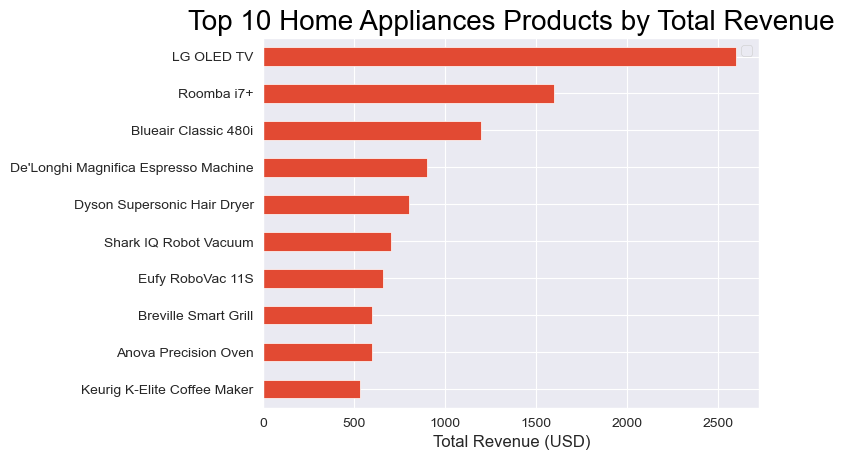

In [183]:
top_10_selling_home_appliances_products.sort_values(by="Total Revenue", ascending=True).plot(kind="barh") 
plt.title("Top 10 Home Appliances Products by Total Revenue",
          color="black",
          fontsize=20)
plt.legend("") 
plt.ylabel("") 
plt.xlabel("Total Revenue (USD)") 
print("") 

In [238]:
top_10_selling_sports_products = online_sales.loc[online_sales["Product Category"] == "Sports"].groupby(["Product Name", "Product Category"])["Total Revenue"].sum().sort_values(ascending=False).reset_index()[:10].set_index("Product Name")
top_10_selling_sports_products
def highlight_max_min(row):
    max_value = row["Total Revenue"].max()
    min_value = row["Total Revenue"].min()
    return ["background-color: green" if val == max_value
            else "background-color: red" if val == min_value
            else " " for val in row]

top_10_selling_sports_products.style.highlight_max(subset=pd.IndexSlice[:, ["Total Revenue"]], color="green") \
                         .highlight_min(subset=pd.IndexSlice[:, ["Total Revenue"]], color="red")

,Product Category,Total Revenue
Product Name,,
Peloton Bike,Sports,1895.000000
Garmin Fenix 6X Pro,Sports,999.990000
Bowflex SelectTech 1090 Adjustable Dumbbells,Sports,699.990000
Fitbit Versa 3,Sports,689.850000
Garmin Forerunner 945,Sports,599.990000
Garmin Edge 530,Sports,599.980000
Babolat Pure Drive Tennis Racket,Sports,599.970000
Polar Vantage V2,Sports,499.950000
Manduka PRO Yoga Mat,Sports,479.960000


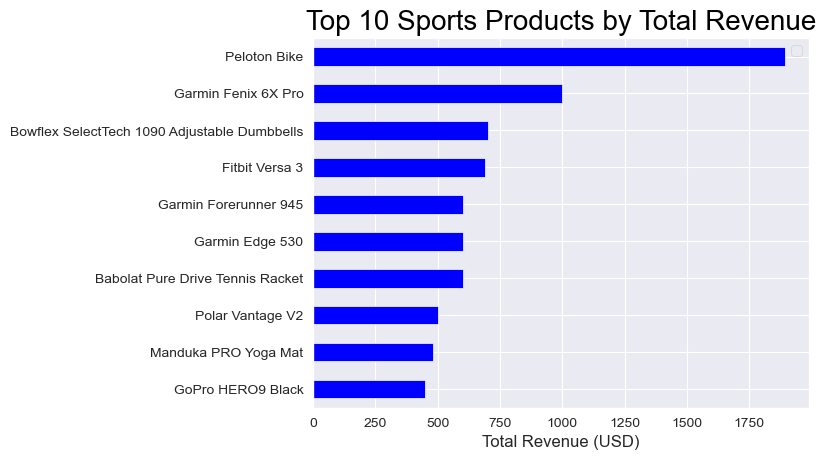

In [187]:
top_10_selling_sports_products.sort_values(by="Total Revenue", ascending=True).plot(kind="barh", color="b")
plt.title("Top 10 Sports Products by Total Revenue",
          color="black",
          fontsize=20)
plt.legend("") 
plt.ylabel("") 
plt.xlabel("Total Revenue (USD)") 
print("") 

Now I will union each individual dataframe to display all of the Product Categories in a single dataframe.

In [239]:
top_10_selling_products = pd.concat([top_10_selling_beauty_products, top_10_selling_book_products, top_10_selling_clothing_products, top_10_selling_electronics_products, top_10_selling_home_appliances_products, top_10_selling_sports_products]).reset_index()
top_10_selling_products
def highlight_max_min(row):
    max_value = row["Total Revenue"].max()
    min_value = row["Total Revenue"].min()
    return ["background-color: green" if val == max_value
            else "background-color: red" if val == min_value
            else " " for val in row]

top_10_selling_products.style.background_gradient(subset=pd.IndexSlice[:, ["Total Revenue"]], cmap="Greens")

,Product Name,Product Category,Total Revenue
0,Dyson Supersonic Hair Dryer,Beauty Products,399.990000
1,La Mer Crème de la Mer Moisturizer,Beauty Products,190.000000
2,Chanel No. 5 Perfume,Beauty Products,129.990000
3,Tom Ford Black Orchid Perfume,Beauty Products,125.000000
4,Sunday Riley Good Genes,Beauty Products,105.000000
5,Estee Lauder Advanced Night Repair,Beauty Products,105.000000
6,Lancome La Vie Est Belle,Beauty Products,102.000000
7,Charlotte Tilbury Magic Cream,Beauty Products,100.000000
8,Neutrogena Skincare Set,Beauty Products,89.990000
9,Kiehl's Midnight Recovery Concentrate,Beauty Products,82.000000


The results above are the top 10 products by total revenue in each category. This could be used as a good indicator as to what products should be maintained in inventory.

###### 5) Can you evaluate the performance of specific products or categories in different regions to tailor marketing campaigns accordingly?

In [240]:
top_10_products_by_asia_region = online_sales.loc[online_sales["Region"] == "Asia"].groupby(["Product Name", "Region"])["Total Revenue"].sum().sort_values(ascending=False).reset_index()[:10]
top_10_products_by_asia_region
def highlight_max_min(row):
    max_value = row["Total Revenue"].max()
    min_value = row["Total Revenue"].min()
    return ["background-color: green" if val == max_value
            else "background-color: red" if val == min_value
            else " " for val in row]

top_10_products_by_asia_region.style.highlight_max(subset=pd.IndexSlice[:, ["Total Revenue"]], color="green") \
                         .highlight_min(subset=pd.IndexSlice[:, ["Total Revenue"]], color="red")

,Product Name,Region,Total Revenue
0,Peloton Bike,Asia,1895.000000
1,Garmin Fenix 6X Pro,Asia,999.990000
2,Bowflex SelectTech 1090 Adjustable Dumbbells,Asia,699.990000
3,Fitbit Versa 3,Asia,689.850000
4,Garmin Forerunner 945,Asia,599.990000
5,Garmin Edge 530,Asia,599.980000
6,Babolat Pure Drive Tennis Racket,Asia,599.970000
7,Nike Air Force 1,Asia,539.940000
8,North Face Down Jacket,Asia,499.980000
9,Polar Vantage V2,Asia,499.950000


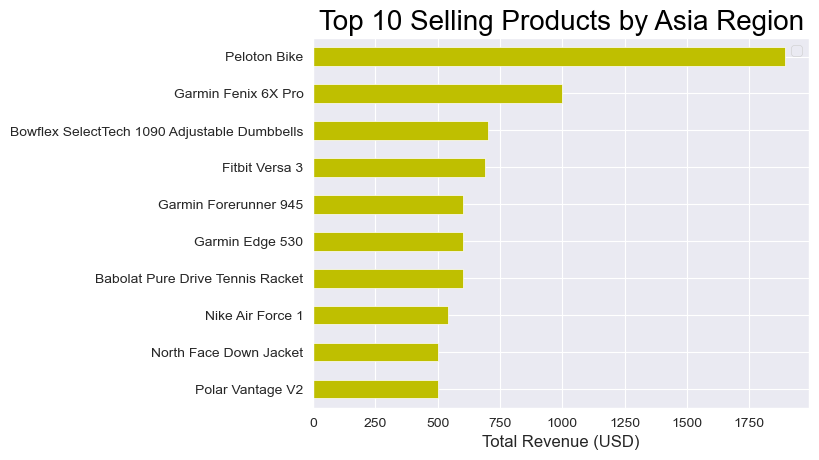

In [212]:
top_10_products_by_asia_region.sort_values(by="Total Revenue", ascending=True).set_index("Product Name").plot(kind="barh", color="y")
plt.title("Top 10 Selling Products by Asia Region",
          color="black",
          fontsize=20)
plt.legend("")
plt.ylabel("") 
plt.xlabel("Total Revenue (USD)") 
print("") 

In [241]:
top_10_products_by_europe_region = online_sales.loc[online_sales["Region"] == "Europe"].groupby(["Product Name", "Region"])["Total Revenue"].sum().sort_values(ascending=False).reset_index()[:10]
top_10_products_by_europe_region
def highlight_max_min(row):
    max_value = row["Total Revenue"].max()
    min_value = row["Total Revenue"].min()
    return ["background-color: green" if val == max_value
            else "background-color: red" if val == min_value
            else " " for val in row]

top_10_products_by_europe_region.style.highlight_max(subset=pd.IndexSlice[:, ["Total Revenue"]], color="green") \
                         .highlight_min(subset=pd.IndexSlice[:, ["Total Revenue"]], color="red")

,Product Name,Region,Total Revenue
0,LG OLED TV,Europe,2599.980000
1,Roomba i7+,Europe,1599.980000
2,Blueair Classic 480i,Europe,1199.980000
3,Dyson Supersonic Hair Dryer,Europe,1199.970000
4,De'Longhi Magnifica Espresso Machine,Europe,899.990000
5,Shark IQ Robot Vacuum,Europe,699.980000
6,Eufy RoboVac 11S,Europe,659.970000
7,Breville Smart Grill,Europe,599.900000
8,Anova Precision Oven,Europe,599.000000
9,Keurig K-Elite Coffee Maker,Europe,529.970000


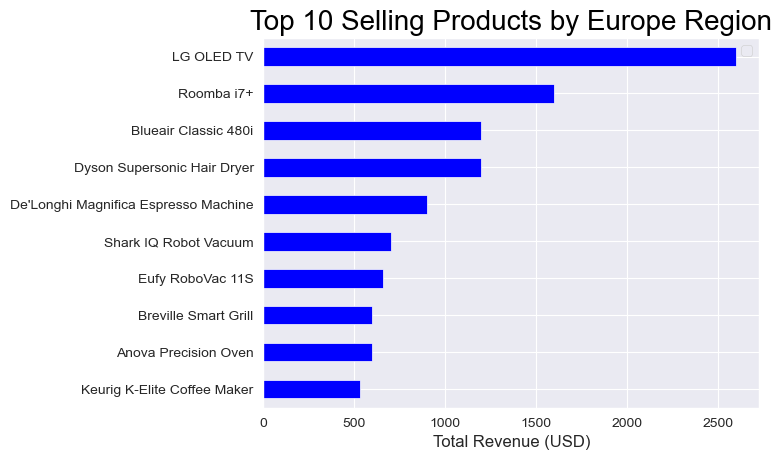

In [214]:
top_10_products_by_europe_region.sort_values(by="Total Revenue", ascending=True).set_index("Product Name").plot(kind="barh", color="blue")
plt.title("Top 10 Selling Products by Europe Region",
          color="black",
          fontsize=20)
plt.legend("") 
plt.ylabel("") 
plt.xlabel("Total Revenue (USD)") 
print("")

In [242]:
top_10_products_by_north_america_region = online_sales.loc[online_sales["Region"] == "North America"].groupby(["Product Name", "Region"])["Total Revenue"].sum().sort_values(ascending=False).reset_index()[:10]
top_10_products_by_north_america_region
def highlight_max_min(row):
    max_value = row["Total Revenue"].max()
    min_value = row["Total Revenue"].min()
    return ["background-color: green" if val == max_value
            else "background-color: red" if val == min_value
            else " " for val in row]

top_10_products_by_north_america_region.style.highlight_max(subset=pd.IndexSlice[:, ["Total Revenue"]], color="green") \
                         .highlight_min(subset=pd.IndexSlice[:, ["Total Revenue"]], color="red")

,Product Name,Region,Total Revenue
0,Canon EOS R5 Camera,North America,3899.990000
1,MacBook Pro 16-inch,North America,2499.990000
2,Apple MacBook Pro 16-inch,North America,2399.000000
3,iPhone 14 Pro,North America,1999.980000
4,HP Spectre x360 Laptop,North America,1599.990000
5,Samsung Odyssey G9 Gaming Monitor,North America,1499.990000
6,Samsung Galaxy Tab S8,North America,1499.980000
7,Microsoft Surface Laptop 4,North America,1299.990000
8,Samsung QLED 4K TV,North America,1199.990000
9,Apple MacBook Air,North America,1199.990000


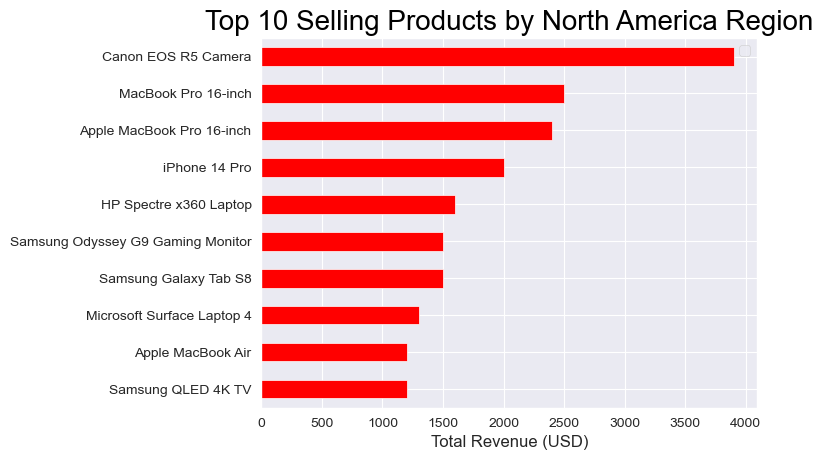

In [215]:
top_10_products_by_north_america_region.sort_values(by="Total Revenue", ascending=True).set_index("Product Name").plot(kind="barh", color="red") 
plt.title("Top 10 Selling Products by North America Region", 
          color="black", 
          fontsize=20)
plt.legend("") 
plt.ylabel("") 
plt.xlabel("Total Revenue (USD)") 
print("") 

In [245]:
top_10_products_by_region = pd.concat([top_10_products_by_asia_region, top_10_products_by_europe_region, top_10_products_by_north_america_region]).reset_index()
top_10_products_by_region
def highlight_max_min(row):
    max_value = row["Total Revenue"].max()
    min_value = row["Total Revenue"].min()
    return ["background-color: green" if val == max_value
            else "background-color: red" if val == min_value
            else " " for val in row]

top_10_products_by_region.style.background_gradient(subset=pd.IndexSlice[:, ["Total Revenue"]], cmap="Greens")

,index,Product Name,Region,Total Revenue
0,0,Peloton Bike,Asia,1895.000000
1,1,Garmin Fenix 6X Pro,Asia,999.990000
2,2,Bowflex SelectTech 1090 Adjustable Dumbbells,Asia,699.990000
3,3,Fitbit Versa 3,Asia,689.850000
4,4,Garmin Forerunner 945,Asia,599.990000
5,5,Garmin Edge 530,Asia,599.980000
6,6,Babolat Pure Drive Tennis Racket,Asia,599.970000
7,7,Nike Air Force 1,Asia,539.940000
8,8,North Face Down Jacket,Asia,499.980000
9,9,Polar Vantage V2,Asia,499.950000


The above results are the top 10 selling products in each region. Marketing campaigns should be directed towards these products s they are the most popular products.


In conclusion, I have demonstrated how to use Python to load, clean, transform, manipulate, and process data in order of reaching the goal to answer business questions. Upon answering the business questions, I also demonstrated how to create visuals to help tell the story of the data.